# ÖDEV-4 Abdürrahim Deniz Kumbaracı 151024008

### Ön hazırlık dosyasında verilen kodlar aşağıya yazılacak:

In [51]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

##--------------------KODLAR buraya eklenecek------------------------
## ....
## ....
## ....





### SORU-1

Bu sistemin sistem fonksiyonu el ile (1 + (2/3)z^-1 + (1/9)z^-2)/(1 - (1/2)Z^-1 + 4z^-2 - 2z^-3) olarak hesaplanabilir. Şimdi bu fonksiyonu sıfır ve kutuplarını daha rahat elde edebilmek için ZPK formuna çevirelim.


Payı ve Paydayı z^3 ile çarparsak;

H(z) = (z^3 + (2/3)z^2 + (1/9)z)/(z^3 - (1/2)z^2 + 4z - 2)



<IPython.core.display.Javascript object>


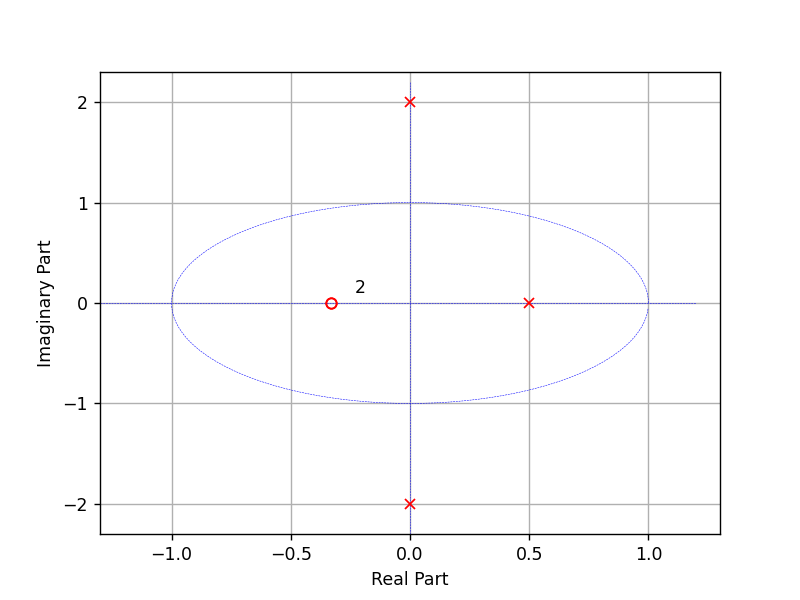

sıfır değerleri [-0.33333333+3.16588799e-09j -0.33333333-3.16588799e-09j]
kutup değerleri [-2.47257828e-16+2.j -2.47257828e-16-2.j  5.00000000e-01+0.j]
Sistemin Kazancı 1.0


In [52]:
import numpy as np
import scipy.signal as sgnl
import matplotlib.pyplot as plt
%matplotlib notebook
import zplane



b = np.array([1,2/3,1/9]) 
a = np.array([1,-1/2,4,-2]) 
z, p, k = sgnl.tf2zpk(b, a) 


b,a = sgnl.zpk2tf(z,p,k) 
zplane.zplane(b,a) 


print('sıfır değerleri',z)
print('kutup değerleri',p)
print('Sistemin Kazancı',k)




Eğer ℎ[𝑛] = 0, 𝑛< 0 ise bu sistem nedenseldir. Yani bu sistem sağ yanlıdır. Sağ yanlı sistemlerin z uzayında ROC u en dıştaki kutup değerinden dışa doğrudur. Bu sistem için  |z|>2 olur.


Eğer bu sistemin fourier dönüşümü var ise bu sistem kararlıdır.Bu da z düzleminde ROC un birim çemberi içericeği anlamına gelir. Bu sistem için birim çemberi barındıracak ve kutup barındırmayacak ROC |z|<0,5 olarak tanımlanabilir.


Şimdi sistemin dürtü cevabını elde etmek için ters z dönüşümü uygulayalım. Bu sistemin nedensel olduğu durmu inceliyeceğimiz için dimpulse fonksiyonunu kullanabiliriz.

<IPython.core.display.Javascript object>


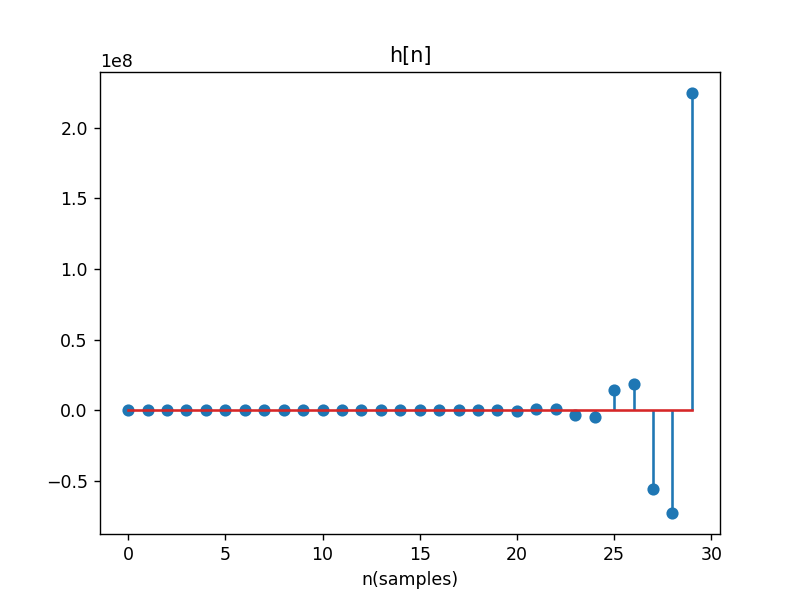

Text(0.5, 1.0, 'h[n]')

In [54]:

num = np.array([1,2/3,1/9]) 
denum = np.array([1,-1/2,4,-2]) 
n, x = sgnl.dimpulse((num, denum, k),x0=0, n=30)

plt.figure()
plt.stem(n, np.squeeze(x))
plt.xlabel('n(samples)')
plt.title('h[n]')

Bu sistemin dürtü cevabı ıraksadığı ve sonlu noktadan oluşmadığı için bu dürtü cevabı mutlak toplanabilir değildir. Bu nedenle kararlı değildir.

Bu sistemin hem kararlı hemde nedensel olabilmesi için z düzleminde genliği 1 veya daha büyük kutubu olmamalıdır. Bu sistemin genliği 1 den büyük kutuplarını çıkarırsak;



H(z) = ((z-0.333)^2)/(z-0.5) = (z^2 -0.666z + (0.333)^2)/(z-0.5) =(1 - 0.666z^-1 + ((0.333)^2)z^-2)/(z^-1 - 0.5 z^-2)





### SORU-2

<IPython.core.display.Javascript object>


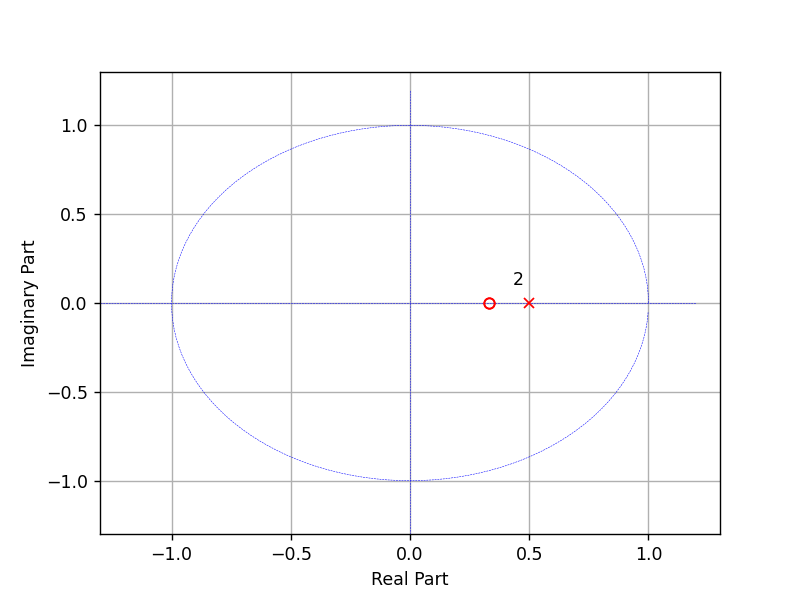

<IPython.core.display.Javascript object>


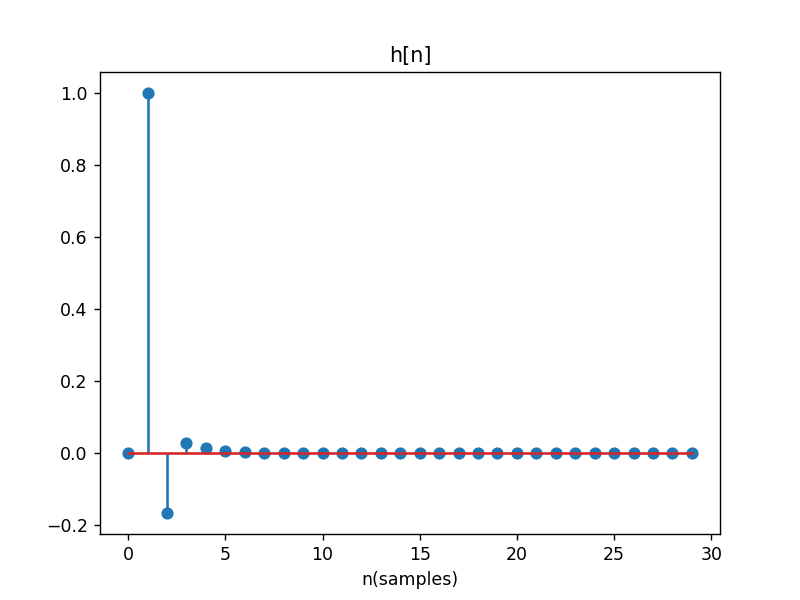

sıfır değerleri [0.333 0.333]
kutup değerleri [0.5]
Sistemin Kazancı 1.0


In [55]:
b = np.array([1,-0.666,pow(0.333,2)]) 
a = np.array([1,-0.5]) 
z, p, k = sgnl.tf2zpk(b, a) 


b,a = sgnl.zpk2tf(z,p,k) 
zplane.zplane(b,a) 



num = np.array([1,-0.666,pow(0.333,2)]) 
denum = np.array([1,-0.5,0,0]) 
n, x = sgnl.dimpulse((num, denum, k),x0=0, n=30)

plt.figure()
plt.stem(n, np.squeeze(x))
plt.title('h[n]')
plt.xlabel('n(samples)')

print('sıfır değerleri',z)
print('kutup değerleri',p)
print('Sistemin Kazancı',k)

Sistemin z uzayındaki kutupları birim çemberin içinde kalınca sistemin dürtü cevabı yakınsak ve n=0 etrafında olucak şekilde toplanmıştır.